In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

In [2]:
basisSets=['sto3G', 'sto6G', '321G','631G*','def2-TZVP','def2-QZVPP','cc-pVTZ','aug-cc-pVQZ']
molecule_list=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
molecules={'HAl':1,'HeMg':2,'LiNa':3,'BeNe':4,'BF':5,'CO':6,'NN':7}
datasets=[dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_ccpvtz,dt_aug,dt_tzvp,dt_qzvpp]

In [3]:
df=dt_sto3g.query("alchemy==0").copy()
df['deltaZ']=[molecules[x] for x in df.target]
df['deltaZ']-=[molecules[x] for x in df.ref]
df['deltaZ']=np.abs(df['deltaZ'])
df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
np.percentile(df.query("deltaZ==2 ").bs_err,q=1)

6.723018763078753

In [4]:
for mol in molecule_list:
    print(molecules[mol])
    
def mol_num(m):
    return(molecules[m])

1
2
3
4
5
6
7


In [5]:
df=dt_tzvp.query("alchemy==0 ").copy()
df['deltaZ']=[molecules[x] for x in df.target]
df['deltaZ']-=[molecules[x] for x in df.ref]
df['deltaZ']=np.abs(df['deltaZ'])
df[::100]
df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
df.query("deltaZ==2 &distance==2.")  #.quantile(q=.66)

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ,bs_err
135,0,2.0,def2-TZVP,-157.476670,-168.929201,HAl,LiNa,11.452531,6.402477,-164.918573,7.441902,2,4.010628
835,0,2.0,def2-TZVP,-130.642152,-143.139697,HeMg,BeNe,12.497544,6.502722,-139.011976,8.369824,2,4.127721
1235,0,2.0,def2-TZVP,-230.405220,-242.367943,LiNa,HAl,11.962723,6.402477,-237.163180,6.757960,2,5.204763
1535,0,2.0,def2-TZVP,-111.453182,-124.425245,LiNa,BF,12.972062,6.506441,-120.582641,9.129459,2,3.842604
1935,0,2.0,def2-TZVP,-189.955919,-202.206240,BeNe,HeMg,12.250322,6.502722,-201.894850,11.938932,2,0.311390
2235,0,2.0,def2-TZVP,-100.323475,-113.129449,BeNe,CO,12.805974,6.131396,-112.217699,11.894224,2,0.911750
2635,0,2.0,def2-TZVP,-156.493313,-168.929201,BF,LiNa,12.435888,6.506441,-168.673448,12.180134,2,0.255754
2935,0,2.0,def2-TZVP,-96.357176,-109.354723,BF,NN,12.997548,5.843402,-108.735878,12.378703,2,0.618845
3335,0,2.0,def2-TZVP,-130.221263,-143.139697,CO,BeNe,12.918433,6.131396,-142.648068,12.426805,2,0.491629
4035,0,2.0,def2-TZVP,-111.354723,-124.425245,NN,BF,13.070521,5.843402,-123.918412,12.563688,2,0.506833


In [13]:
datasets2=[]
for dt in datasets:
    df=dt.query("alchemy==0 ").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
    datasets2.append(df)

In [24]:
datasets2[5][-10:]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ,bs_err
4150,0,2.3,aug-cc-pVQZ,-109.789282,-113.155625,NN,CO,3.366343,3.016096,-113.135038,3.345756,1,0.020587
4155,0,2.4,aug-cc-pVQZ,-109.744835,-113.136303,NN,CO,3.391468,3.034232,-113.115428,3.370593,1,0.020875
4160,0,2.5,aug-cc-pVQZ,-109.698342,-113.112744,NN,CO,3.414402,3.046930,-113.091636,3.393294,1,0.021108
4165,0,2.6,aug-cc-pVQZ,-109.651390,-113.086656,NN,CO,3.435266,3.054917,-113.065352,3.413962,1,0.021304
4170,0,2.7,aug-cc-pVQZ,-109.605082,-113.059269,NN,CO,3.454186,3.059971,-113.037787,3.432705,1,0.021481
4175,0,2.8,aug-cc-pVQZ,-109.560168,-113.031458,NN,CO,3.471290,3.063668,-113.009807,3.449639,1,0.021651
4180,0,2.9,aug-cc-pVQZ,-109.517140,-113.003856,NN,CO,3.486716,3.066644,-112.982040,3.464899,1,0.021817
4185,0,3.0,aug-cc-pVQZ,-109.476317,-112.976933,NN,CO,3.500616,3.069318,-112.954957,3.478640,1,0.021976
4190,0,3.1,aug-cc-pVQZ,-109.437896,-112.951077,NN,CO,3.513180,3.072684,-112.928952,3.491056,1,0.022125
4195,0,3.2,aug-cc-pVQZ,-109.402000,-112.926669,NN,CO,3.524669,3.076565,-112.904410,3.502410,1,0.022258


In [68]:
df=datasets2[4].query("deltaZ==2& ref !='LiNa' & target!='LiNa' & not(ref in ['HeMg','BeNe'] & target in ['HeMg','BeNe'])")
df[::10]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ,bs_err
2200,0,1.3,cc-pVTZ,-99.828824,-111.680284,BeNe,CO,11.851460,5.288915,-109.067864,9.239040,2,2.612420
2250,0,2.3,cc-pVTZ,-100.142095,-113.123880,BeNe,CO,12.981785,6.253261,-109.816819,9.674724,2,3.307061
2900,0,1.3,cc-pVTZ,-96.047564,-107.943590,BF,NN,11.896025,4.986413,-106.455866,10.408302,2,1.487723
2950,0,2.3,cc-pVTZ,-96.025693,-109.324837,BF,NN,13.299144,6.018340,-106.919827,10.894134,2,2.405010
3300,0,1.3,cc-pVTZ,-129.706023,-141.504476,CO,BeNe,11.798453,5.288915,-139.997073,10.291050,2,1.507403
3350,0,2.3,cc-pVTZ,-130.049147,-143.273819,CO,BeNe,13.224672,6.253261,-141.161685,11.112537,2,2.112134
4000,0,1.3,cc-pVTZ,-111.020513,-122.868873,NN,BF,11.848360,4.986413,-121.267661,10.247148,2,1.601212
4050,0,2.3,cc-pVTZ,-111.063967,-124.488132,NN,BF,13.424165,6.018340,-122.240836,11.176869,2,2.247296


/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


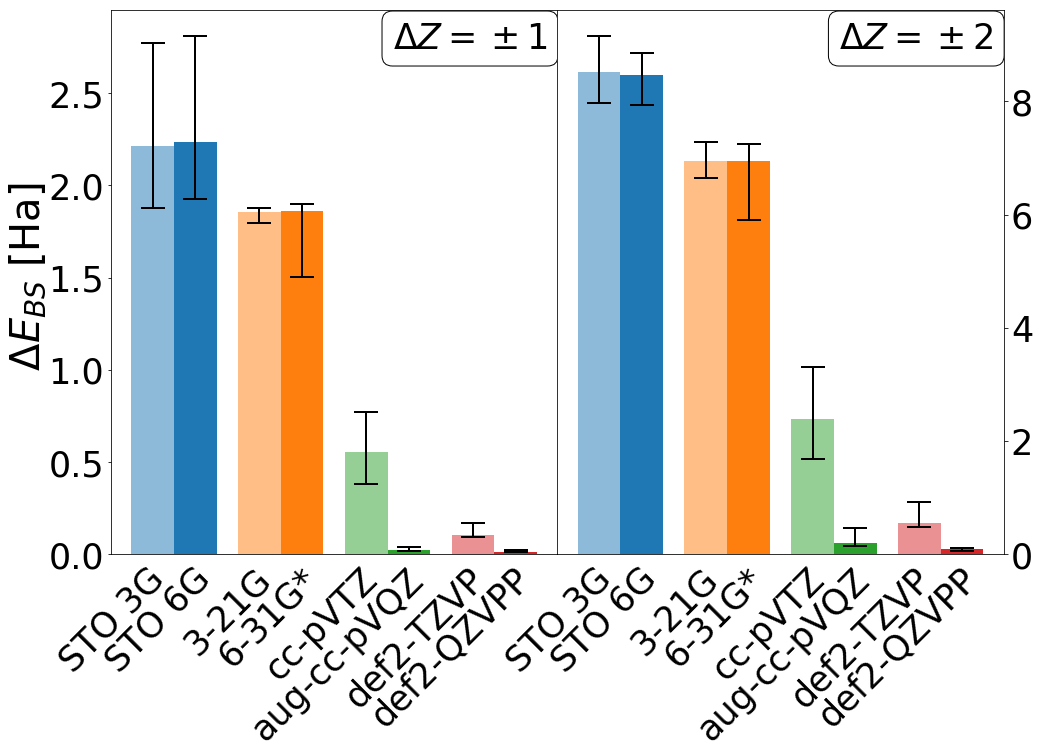

In [109]:
fig= plt.figure(figsize=(16,8))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r" $\Delta E_{BS} $ [Ha]",fontsize=40,labelpad=40)
plt.axes().set_frame_on(False)
subplspec={'wspace':0,}
axs=fig.subplots(1,2, sharex=True,gridspec_kw=subplspec)

axs[0].tick_params(axis='y',labelsize=35)

# dz=1
ticks=[]
width=.4
for i in range(4):
# The small basis set 
    df=datasets2[i*2].query("deltaZ==1 & ref in ['BeNe','BF','CO','NN'] & target in ['BeNe','BF','CO','NN']")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[0].bar(i-width/2,(df.bs_err).median(),width,color='C'+str(i),alpha=.5,yerr=yerr_v,capsize=12,error_kw={"capthick":2,"linewidth":2})

# The big basis set 
    df=datasets2[i*2+1].query("deltaZ==1 & ref in ['BeNe','BF','CO','NN'] & target in ['BeNe','BF','CO','NN']")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[0].bar(i+width/2,(df.bs_err).median(),width,color='C'+str(i),yerr=yerr_v ,capsize=12,error_kw={"capthick":2,"linewidth":2})
    ticks.append(i-width/2+.17), ticks.append(i+width/2+.20)
axs[1].tick_params(axis='y',labelsize=35)
axs[1].yaxis.tick_right()

#  dz=2
width=.4
for i in range(4):
 # The small basis set   
    df=datasets2[i*2].query("deltaZ==2& ref in ['BeNe','BF','CO','NN'] & target in ['BeNe','BF','CO','NN']")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[1].bar(i-width/2,(df.bs_err).median(),width,color='C'+str(i),alpha=.5,yerr=yerr_v,error_kw={"capthick":2,"linewidth":2},capsize=12)
 # The big basis set
    df=datasets2[i*2+1].query("deltaZ==2& ref in ['BeNe','BF','CO','NN'] & target in ['BeNe','BF','CO','NN']")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[1].bar(i+width/2,(df.bs_err).median(),width,color='C'+str(i), yerr=yerr_v,capsize=12,error_kw={"capthick":2,"linewidth":2})
       
#axs[0].set_yticks((axs[0].get_yticks())[1:-1])
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                       rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[0].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=True)
#axs[1].set_yticks((axs[1].get_yticks())[1:-1])
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                      rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[1].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=True)

box_params=dict(boxstyle='round', facecolor='white', alpha=1.)
axs[0].text(.57*axs[0].get_xlim()[1],.93*axs[0].get_ylim()[1],r'$\Delta Z=\pm 1$',clip_on=True,bbox=box_params, fontsize=35)
axs[1].text(.57*axs[1].get_xlim()[1],.93*axs[1].get_ylim()[1],r'$\Delta Z=\pm 2$',clip_on=True,bbox=box_params, fontsize=35)
fig.set_size_inches(16,10,forward=False)

fig.savefig('bs_error_stats.png', bbox_inches='tight')

In [143]:
# Ora la tabella 
me1=[]
me2=[]
bs_names=[]
fle=[]
for i in range(8):
    df=datasets2[i].query("ref in ['BeNe','BF','CO','NN'] & target in ['BeNe','BF','CO','NN']")
    me1.append(int(round(df.query("deltaZ==1").bs_err.median()*1000)))
    me2.append(int(round(df.query("deltaZ==2").bs_err.median()*1000)))
    bs_names.append(df.basis_set.to_numpy()[0])
    fle.append(int(round(datasets2[i].query("ref in ['HAl','HeMg'] & target in ['HAl','HeMg']").bs_err.median()*1000)))
bs_names,fle,me1,me2
df2 = pd.DataFrame({"Basis set":bs_names,r" $\Delta E_{BS}$ ($\pm 1$) " :me1,r" $\Delta E_{BS}$ ($\pm 2$) " :me2,\
                   r" $\Delta E_{BS}$ HAl $ \leftrightarrow$ HeMg" :fle })
print(df2.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &    Basis set &   \$\textbackslash Delta E\_\{BS\}\$ (\$\textbackslash pm 1\$)  &   \$\textbackslash Delta E\_\{BS\}\$ (\$\textbackslash pm 2\$)  &   \$\textbackslash Delta E\_\{BS\}\$ HAl \$ \textbackslash leftrightarrow\$ HeMg \\
\midrule
0 &        sto3G &                         2215 &                         8519 &                                          1684 \\
1 &        sto6G &                         2238 &                         8460 &                                          1687 \\
2 &         321G &                         1855 &                         6956 &                                          1775 \\
3 &        631G* &                         1862 &                         6947 &                                          1762 \\
4 &      cc-pVTZ &                          553 &                         2382 &                                          1260 \\
5 &  aug-cc-pVQZ &                           23 &                        

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


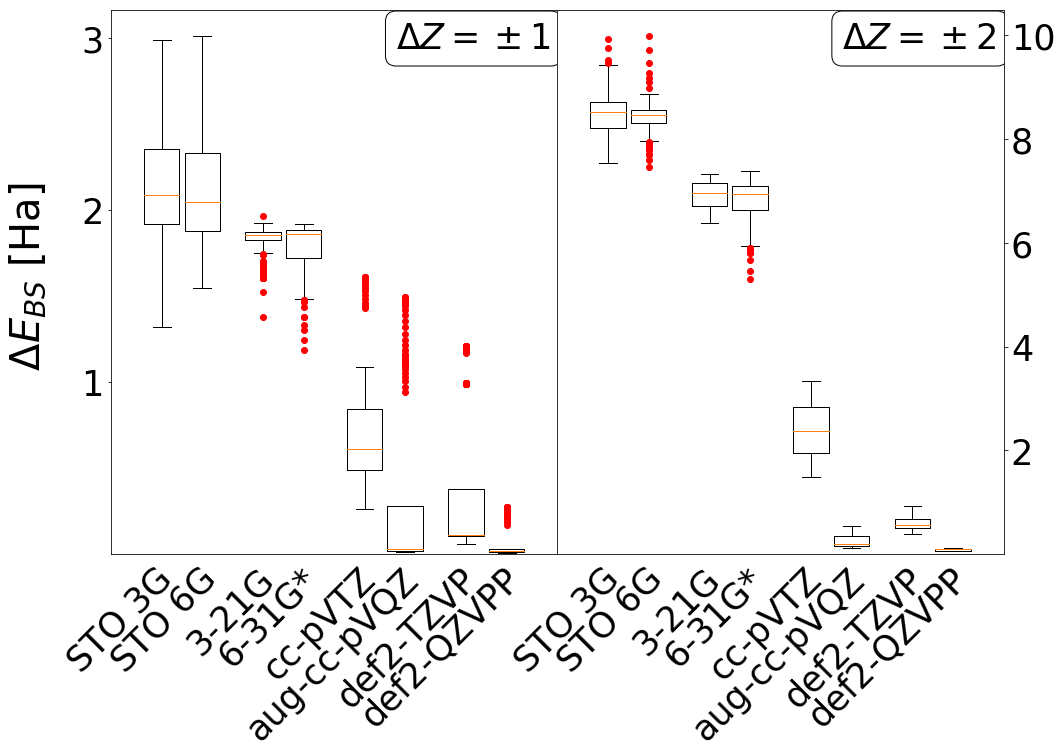

In [103]:
# Piu' carico di significato, ma veramente brutto da vedere 


fig= plt.figure(figsize=(16,8))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r" $\Delta E_{BS} $ [Ha]",fontsize=40,labelpad=40)
plt.axes().set_frame_on(False)
subplspec={'wspace':0,}
axs=fig.subplots(1,2, sharex=True,gridspec_kw=subplspec)

axs[0].tick_params(axis='y',labelsize=35)

# dz=1
ticks=[]
width=.4
for i in range(4):
# The small basis set 
    df=datasets2[i*2].query("deltaZ==1 & ref !='LiNa' & (target not in ['LiNa'] )")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[0].boxplot(df.bs_err,sym='ro',positions=[i-.2],widths=.35)

# The big basis set 
    df=datasets2[i*2+1].query("deltaZ==1 & ref !='LiNa' & target not in ['LiNa'] ")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[0].boxplot(df.bs_err,sym='ro',positions=[i+.2],widths=.35)
    ticks.append(i-width/2+.17), ticks.append(i+width/2+.20)
axs[1].tick_params(axis='y',labelsize=35)
axs[1].yaxis.tick_right()

#  dz=2
width=.4
for i in range(4):
 # The small basis set   
    df=datasets2[i*2].query("deltaZ==2& ref !='LiNa' & target!='LiNa' & not(ref in ['HeMg','BeNe'] & target in ['HeMg','BeNe'])")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[1].boxplot(df.bs_err,sym='ro',positions=[i-.2],widths=.35)
 # The big basis set
    df=datasets2[i*2+1].query("deltaZ==2& ref !='LiNa' & target!='LiNa' & not(ref in ['HeMg','BeNe'] & target in ['HeMg','BeNe'])")
    yerr_v=np.abs(np.array([[df.bs_err.quantile(q=.1)],[df.bs_err.quantile(q=.9)]])-df.bs_err.median())
    axs[1].boxplot(df.bs_err,sym='ro',positions=[i+.2],widths=.35)

axs[0].set_ylim([0,axs[0].get_ylim()[1]])       
axs[1].set_ylim([0,axs[1].get_ylim()[1]])
axs[0].set_yticks((axs[0].get_yticks())[1:-1])
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                       rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[0].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=True)
axs[1].set_yticks((axs[1].get_yticks())[1:-1])
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                      rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[1].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=True)

box_params=dict(boxstyle='round', facecolor='white', alpha=1.)
axs[0].text(.57*axs[0].get_xlim()[1],.93*axs[0].get_ylim()[1],r'$\Delta Z=\pm 1$',clip_on=True,bbox=box_params, fontsize=35)
axs[1].text(.57*axs[1].get_xlim()[1],.93*axs[1].get_ylim()[1],r'$\Delta Z=\pm 2$',clip_on=True,bbox=box_params, fontsize=35)
fig.set_size_inches(16,10,forward=False)
